<a href="https://colab.research.google.com/github/zly554411-arch/ECON3916-Statistical-Machine-Learning/blob/main/Lab%203/Lab_3_Benchmarking_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: CHE (Switzerland), HIC (High Income), WLD (World)
country_codes = ['CHE', 'HIC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [7]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_che = df.xs('CHE', axis=1, level=0).copy()

Fetching data...


In [8]:
df_che.head(10)

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
2000,1.558529,10.032345,11.159891,51.437723,27.234191,46.499133,5.298380e+11,73749.938952,32.172780,67.296,3994754.0,2.658
2001,0.989020,8.970633,11.163767,50.202696,27.695137,45.837141,5.381865e+11,74439.463764,32.060692,67.770,4061716.0,2.490
2002,0.642712,8.955704,11.542898,48.559641,26.214940,43.222210,5.377924e+11,73824.384917,31.552372,67.750,4106054.0,2.924
2003,0.638273,8.977577,11.734894,47.720718,25.984418,42.614778,5.376182e+11,73254.952986,31.090359,67.849,4152630.0,4.117
2004,0.802909,9.020394,11.514910,51.299985,24.548464,44.217109,5.521431e+11,74718.683626,31.631340,67.264,4156420.0,4.316
2005,1.171954,9.126161,11.248252,53.854174,27.189219,48.406998,5.673253e+11,76282.984070,32.636395,66.960,4176168.0,4.437
2006,1.059509,9.194038,10.742765,56.609185,27.918934,49.635970,5.904361e+11,78893.807820,34.892150,67.320,4237789.0,3.995
2007,0.732351,9.065624,10.424410,61.552815,26.788815,51.779043,6.135597e+11,81254.170102,36.562586,67.615,4307426.0,3.641
2008,2.426041,9.587142,10.570699,63.129319,27.412026,53.648681,6.307884e+11,82481.068056,36.892664,68.192,4411012.0,3.350


In [9]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_che['Natural_Rate_Unemp'] = df_che['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_che['Productivity'] = df_che['GDP_Const'] / df_che['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_che['NCO'] = df_gtm['Exports_GDP'] - df_che['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_che['Budget_Balance'] = df_che['Tax_Rev_GDP'] - df_che['Gov_Exp_GDP']

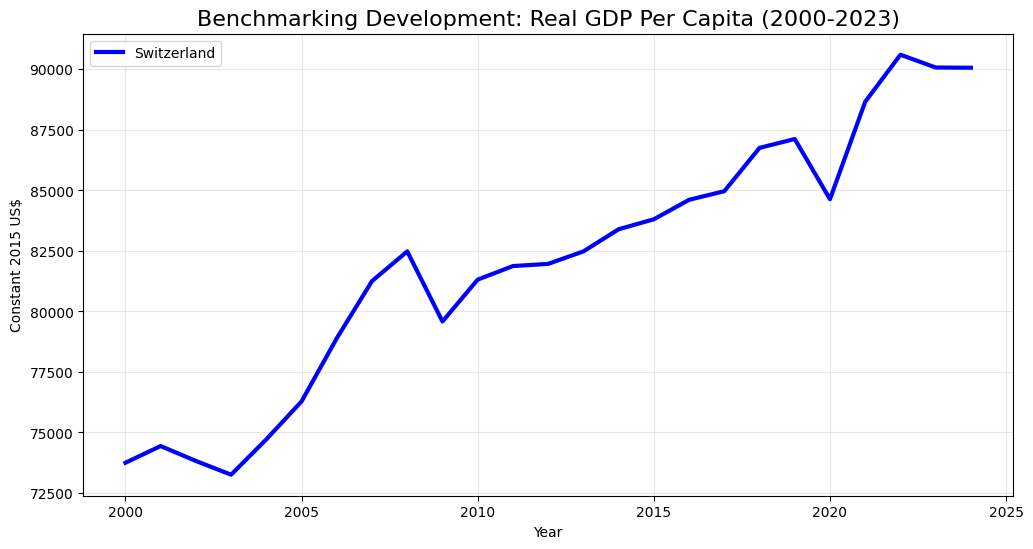

In [11]:
plt.figure(figsize=(12, 6))
# Plot ONLY Switzerland
plt.plot(df.index, df[('CHE', 'GDP_Per_Capita_Const')], label='Switzerland', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

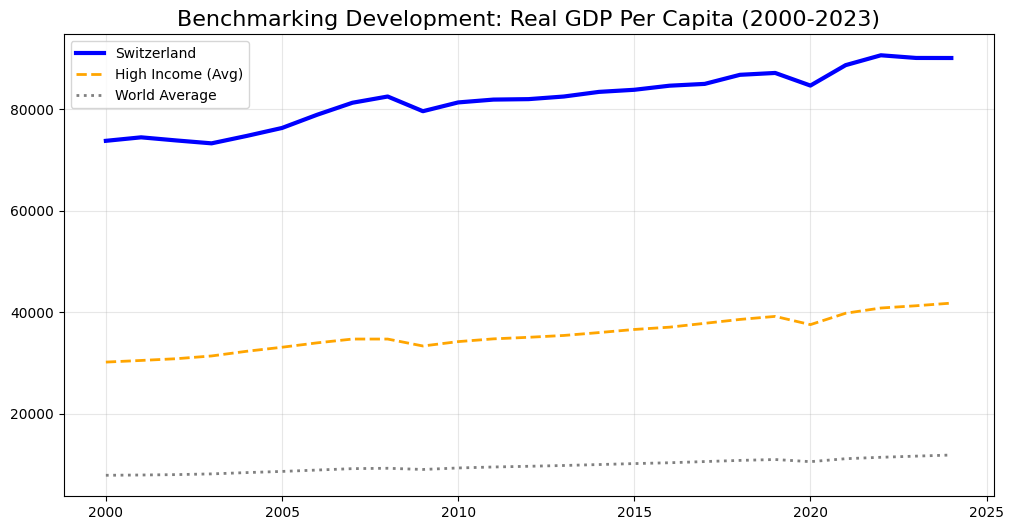

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHE', 'GDP_Per_Capita_Const')], label='Switzerland', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('HIC', 'GDP_Per_Capita_Const')], label='High Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

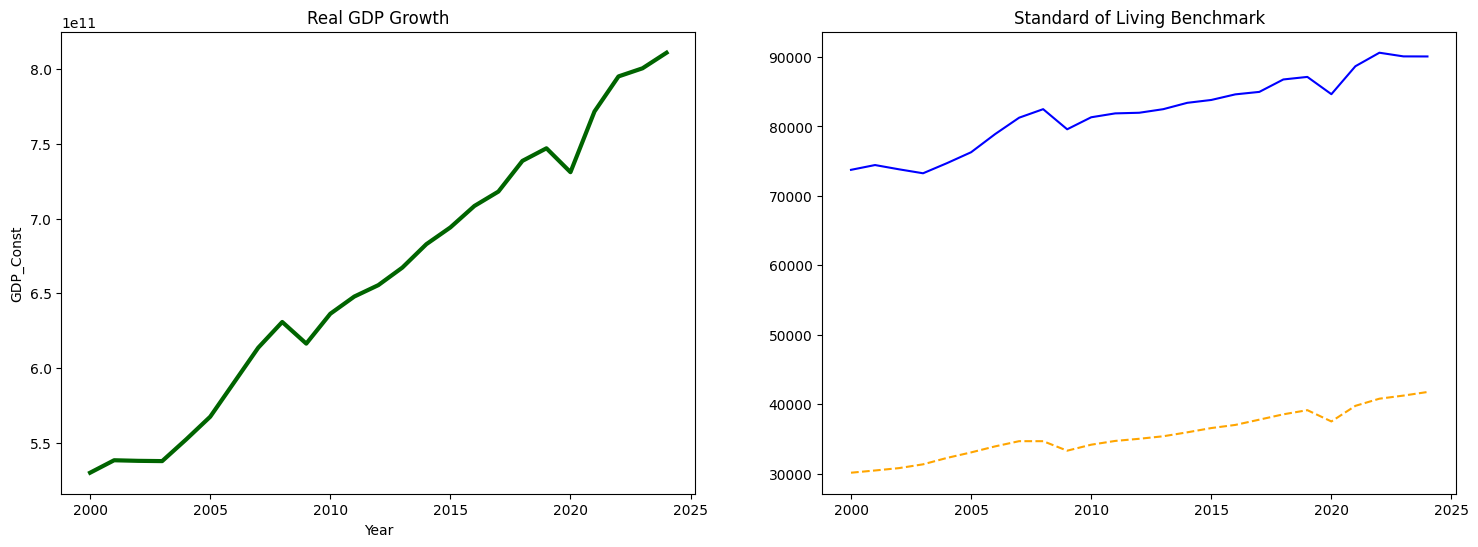

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_che, x=df_che.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHE', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('HIC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

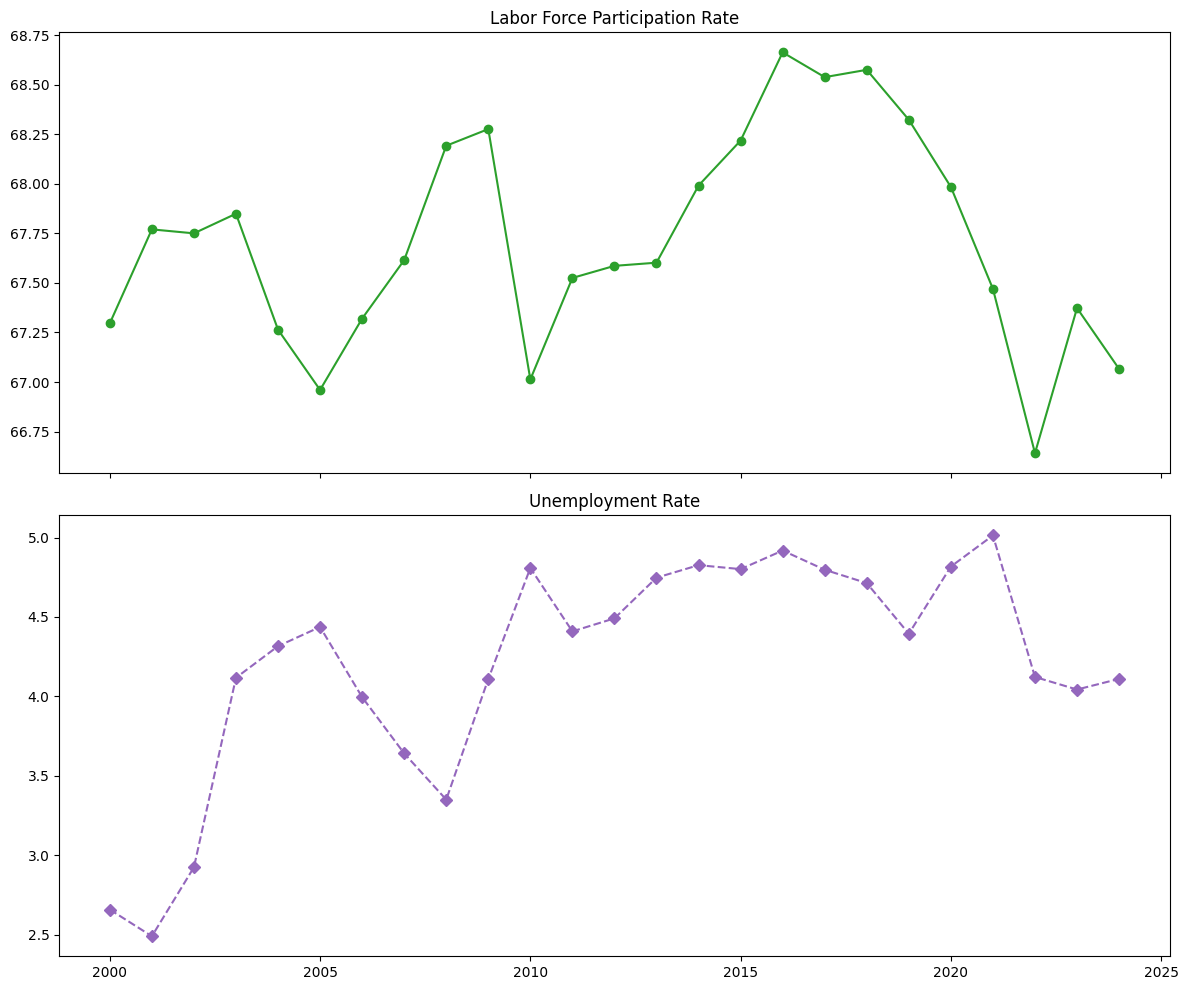

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_che.index, df_che['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_che.index, df_che['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

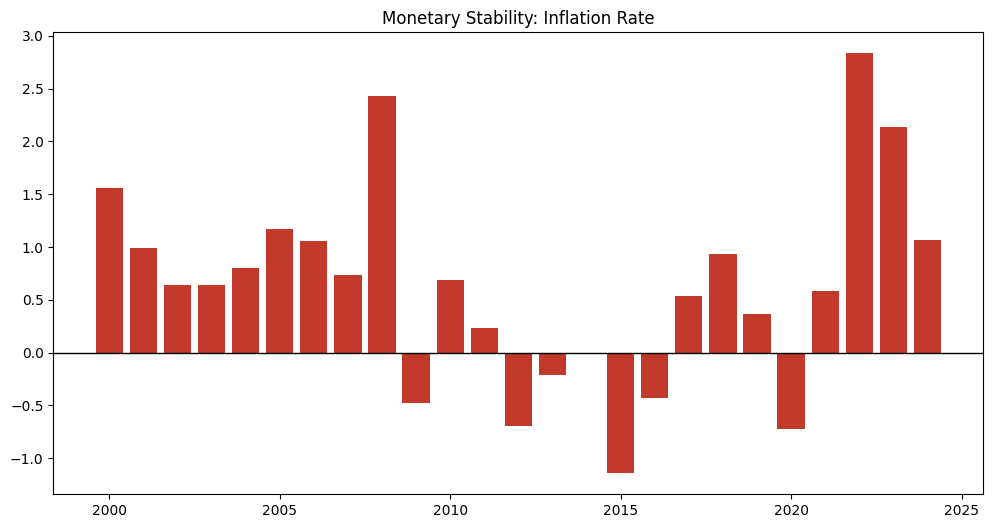

In [15]:
plt.figure(figsize=(12, 6))

plt.bar(df_che.index, df_che['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

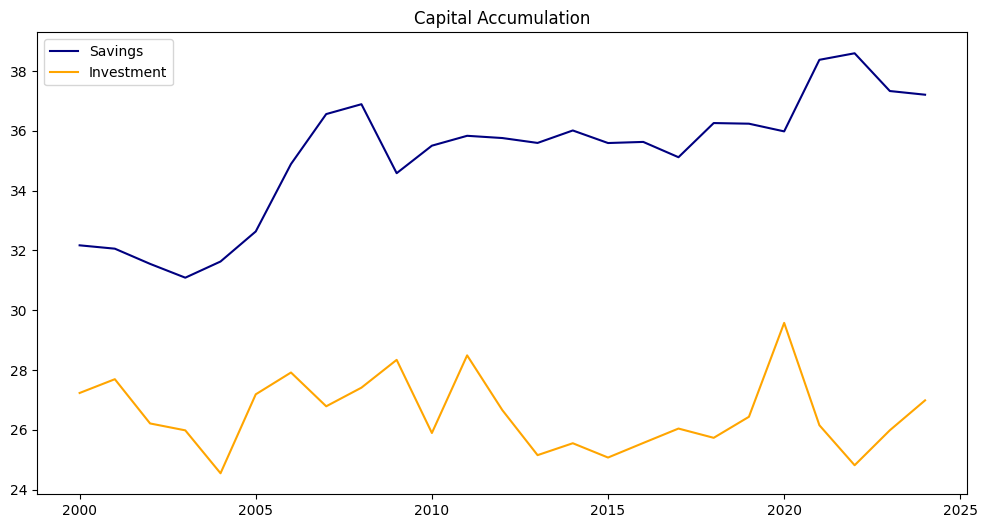

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_che.index, df_che['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_che.index, df_che['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

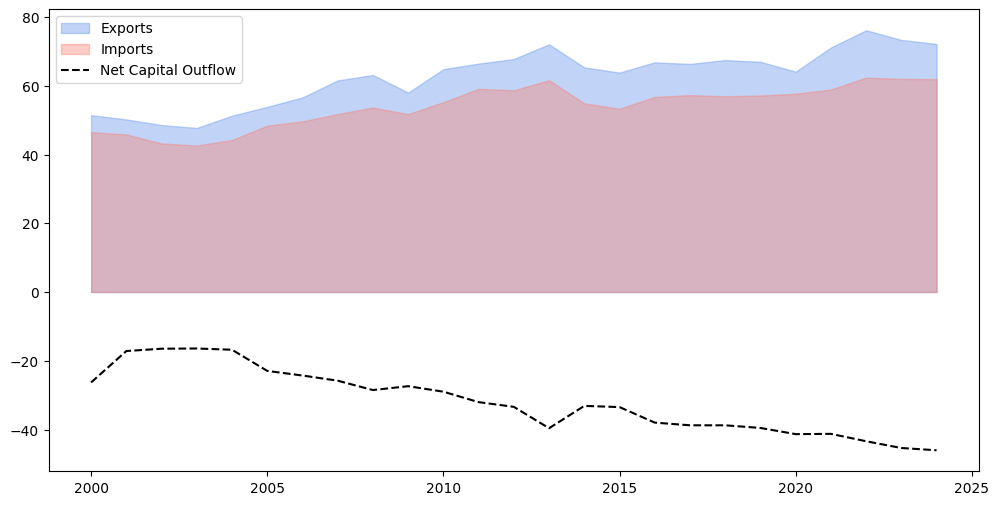

In [17]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_che.index, df_che['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_che.index, df_che['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_che.index, df_che['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

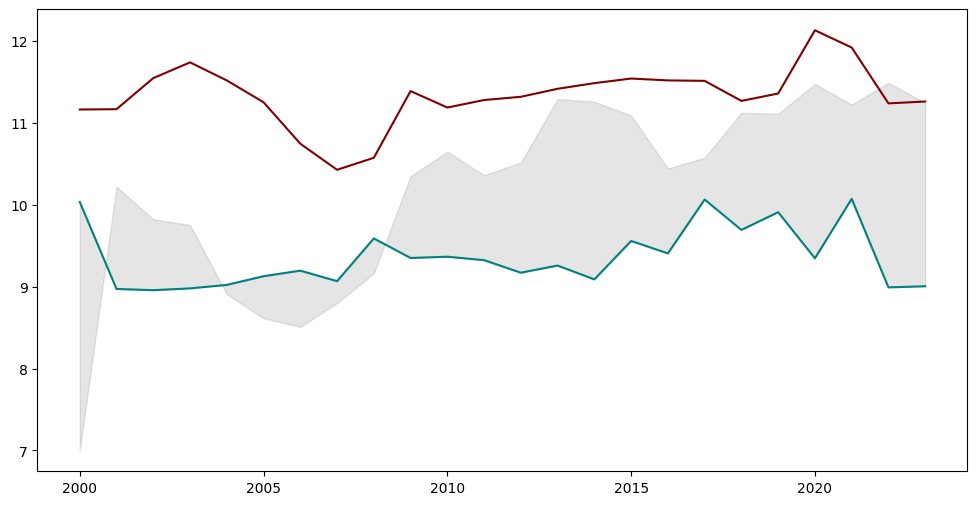

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_che.index, df_che['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_che.index, df_che['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_che.index, df_che['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

/tmp/ipython-input-3772329899.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range('2000', '2023', freq='Y')


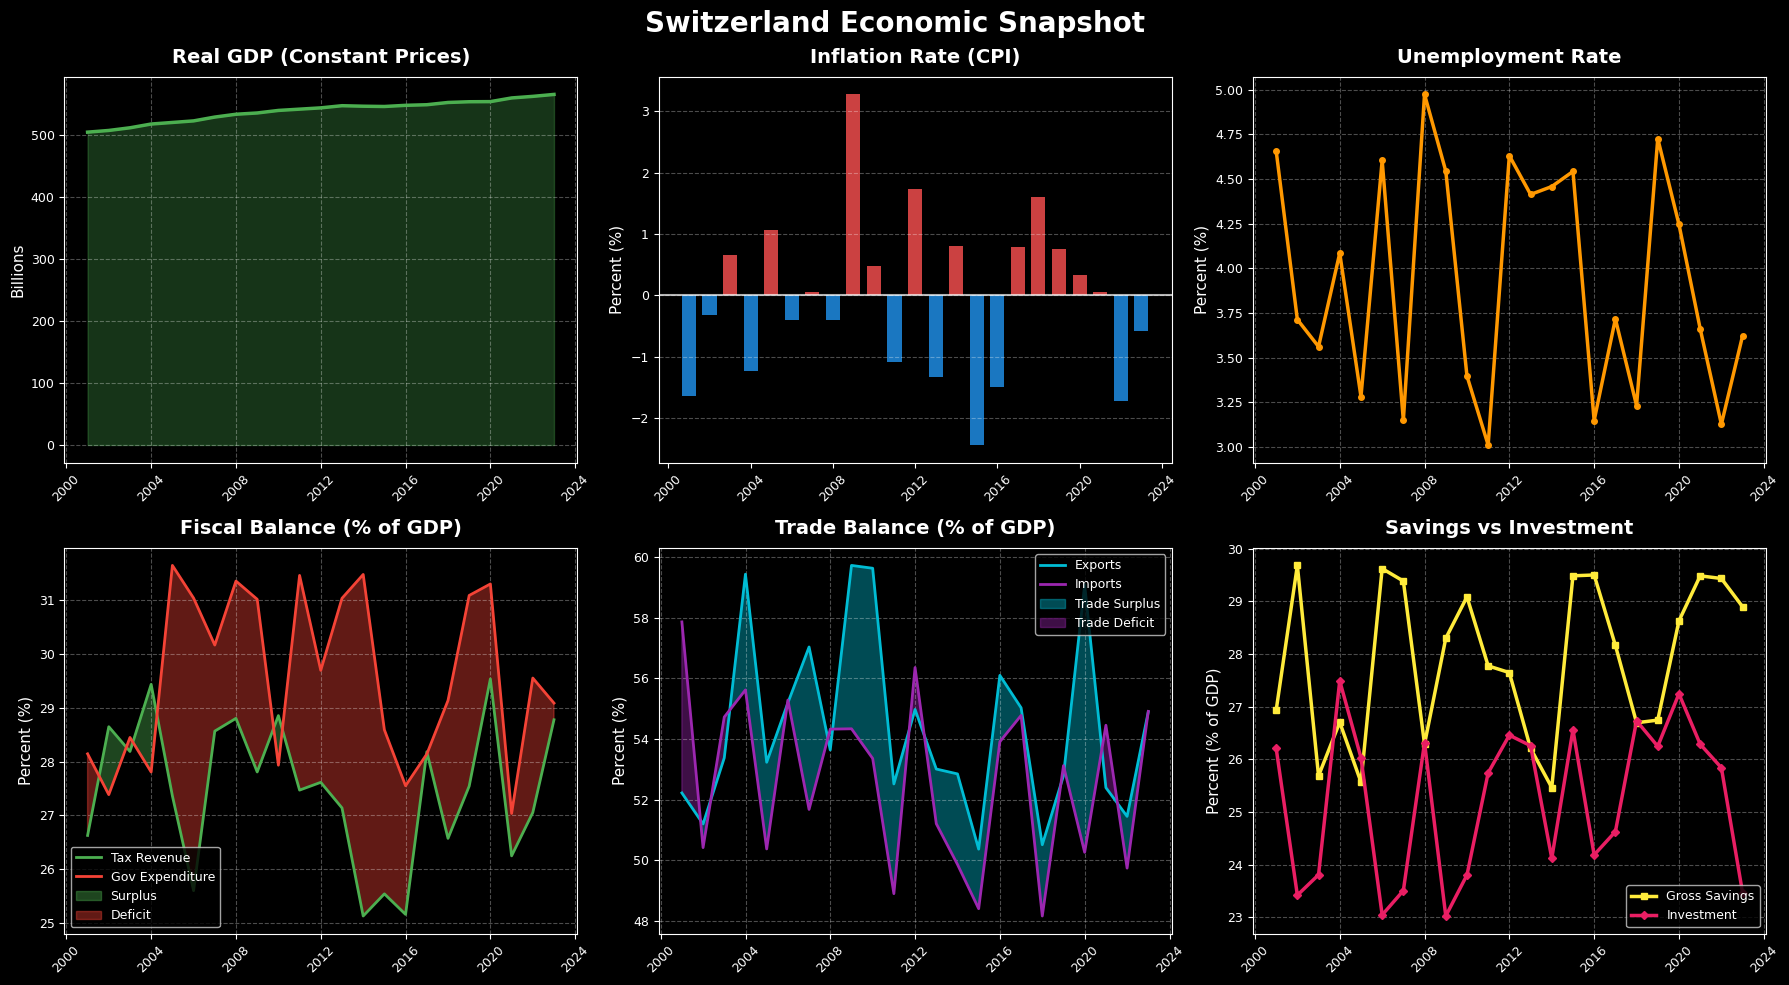

In [19]:
import numpy as np

# Set the dark background style
plt.style.use('dark_background')

# Create sample data (replace with your actual df_che DataFrame)
years = pd.date_range('2000', '2023', freq='Y')
np.random.seed(42)

df_che = pd.DataFrame({
    'Year': years,
    'GDP_Const': np.cumsum(np.random.randn(len(years)) * 2 + 3) + 500,
    'Inflation_CPI': np.random.randn(len(years)) * 1.5 + 0.5,
    'Unemployment_Rate': np.random.rand(len(years)) * 2 + 3,
    'Tax_Rev_GDP': np.random.rand(len(years)) * 5 + 25,
    'Gov_Exp_GDP': np.random.rand(len(years)) * 5 + 27,
    'Exports_GDP': np.random.rand(len(years)) * 10 + 50,
    'Imports_GDP': np.random.rand(len(years)) * 10 + 48,
    'Gross_Dom_Savings': np.random.rand(len(years)) * 5 + 25,
    'Gross_Cap_Formation': np.random.rand(len(years)) * 5 + 23
})

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Switzerland Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# 1. Top Left: Real GDP (Line chart)
axes[0, 0].plot(df_che['Year'], df_che['GDP_Const'], linewidth=2.5, color='#4CAF50')
axes[0, 0].fill_between(df_che['Year'], df_che['GDP_Const'], alpha=0.3, color='#4CAF50')
axes[0, 0].set_title('Real GDP (Constant Prices)', fontsize=14, fontweight='bold', pad=10)
axes[0, 0].set_ylabel('Billions', fontsize=11)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 2. Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
colors = ['#FF5252' if x > 0 else '#2196F3' for x in df_che['Inflation_CPI']]
axes[0, 1].bar(df_che['Year'], df_che['Inflation_CPI'], color=colors, alpha=0.8, width=250)
axes[0, 1].axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold', pad=10)
axes[0, 1].set_ylabel('Percent (%)', fontsize=11)
axes[0, 1].grid(True, alpha=0.3, linestyle='--', axis='y')

# 3. Top Right: Unemployment Rate (Line chart)
axes[0, 2].plot(df_che['Year'], df_che['Unemployment_Rate'], linewidth=2.5, color='#FF9800', marker='o', markersize=4)
axes[0, 2].set_title('Unemployment Rate', fontsize=14, fontweight='bold', pad=10)
axes[0, 2].set_ylabel('Percent (%)', fontsize=11)
axes[0, 2].grid(True, alpha=0.3, linestyle='--')

# 4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
axes[1, 0].plot(df_che['Year'], df_che['Tax_Rev_GDP'], linewidth=2, color='#4CAF50', label='Tax Revenue')
axes[1, 0].plot(df_che['Year'], df_che['Gov_Exp_GDP'], linewidth=2, color='#F44336', label='Gov Expenditure')
axes[1, 0].fill_between(df_che['Year'], df_che['Tax_Rev_GDP'], df_che['Gov_Exp_GDP'],
                         where=(df_che['Tax_Rev_GDP'] >= df_che['Gov_Exp_GDP']),
                         interpolate=True, alpha=0.4, color='#4CAF50', label='Surplus')
axes[1, 0].fill_between(df_che['Year'], df_che['Tax_Rev_GDP'], df_che['Gov_Exp_GDP'],
                         where=(df_che['Tax_Rev_GDP'] < df_che['Gov_Exp_GDP']),
                         interpolate=True, alpha=0.4, color='#F44336', label='Deficit')
axes[1, 0].set_title('Fiscal Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
axes[1, 0].set_ylabel('Percent (%)', fontsize=11)
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(True, alpha=0.3, linestyle='--')

# 5. Bottom Middle: Trade Balance (Fill area between Exports and Imports)
axes[1, 1].plot(df_che['Year'], df_che['Exports_GDP'], linewidth=2, color='#00BCD4', label='Exports')
axes[1, 1].plot(df_che['Year'], df_che['Imports_GDP'], linewidth=2, color='#9C27B0', label='Imports')
axes[1, 1].fill_between(df_che['Year'], df_che['Exports_GDP'], df_che['Imports_GDP'],
                         where=(df_che['Exports_GDP'] >= df_che['Imports_GDP']),
                         interpolate=True, alpha=0.4, color='#00BCD4', label='Trade Surplus')
axes[1, 1].fill_between(df_che['Year'], df_che['Exports_GDP'], df_che['Imports_GDP'],
                         where=(df_che['Exports_GDP'] < df_che['Imports_GDP']),
                         interpolate=True, alpha=0.4, color='#9C27B0', label='Trade Deficit')
axes[1, 1].set_title('Trade Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
axes[1, 1].set_ylabel('Percent (%)', fontsize=11)
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

# 6. Bottom Right: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_che['Year'], df_che['Gross_Dom_Savings'], linewidth=2.5, color='#FFEB3B', marker='s', markersize=4, label='Gross Savings')
axes[1, 2].plot(df_che['Year'], df_che['Gross_Cap_Formation'], linewidth=2.5, color='#E91E63', marker='D', markersize=4, label='Investment')
axes[1, 2].set_title('Savings vs Investment', fontsize=14, fontweight='bold', pad=10)
axes[1, 2].set_ylabel('Percent (% of GDP)', fontsize=11)
axes[1, 2].legend(loc='best', fontsize=9)
axes[1, 2].grid(True, alpha=0.3, linestyle='--')

# Format x-axis for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

# Use tight_layout to prevent overlap
plt.tight_layout()
plt.show()